In [1]:
import numpy
import pickle
import math
import h5py
import os
from numpy.random import normal
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
def sigact(val):
    val = -1*val
    toret = 1/(1+numpy.exp(val))
    return toret 

In [3]:
def softmax(vec):
    return numpy.exp(vec)/numpy.sum(numpy.exp(vec))

In [4]:
def sigact_derivative(val):
    save = sigact(val)
    toret = save*(1-save)
    if(len(toret.shape) == 1):
        toret = numpy.expand_dims(toret, axis = 0)
    return toret

In [5]:
def forwardprop(img, weights, biases):
    out = img
    layer_outputs = []
    layer_outputs.append(out)
    
    for j in range(len(weights)):
        out = sigact(numpy.dot(weights[j].T,out) + biases[j])
        layer_outputs.append(out)
    
    layers_outputs = softmax(out)
    return layer_outputs

In [6]:
def backwardprop(layer_output, weights, biases, expected):
    deltas = []
    wei = []
    bia = []
    
    d = layer_output[-1] - expected
    dw = numpy.dot(layer_output[-2],d.T)
    db = d
    
    wei.append(dw)
    bia.append(db)
    deltas.append(d)
    
    #Derivative of sigmoid
    cnt = 1
    for i in range(len(weights)-1, 0, -1):
        
        d = numpy.dot(weights[-(cnt)], deltas[-1]) * sigact_derivative(layer_output[i])
        
        if len(layer_output[-(cnt+2)].shape) == 1:
            layer_output[-(cnt+2)] = numpy.expand_dims(layer_output[-(cnt+2)], axis = 0)
        
        dw = numpy.dot((layer_output[-(cnt+2)]),d.T)
        
        db = d
        wei.append(dw)
        bia.append(db)
        deltas.append(d)
        cnt += 1
        
    return wei, bia

In [7]:
def update_weights(wei_tosend, bia_tosend, weights, biases, alpha):
    for q in range(len(wei_tosend)):
        wei_tosend[q] = numpy.multiply(wei_tosend[q], alpha)
        bia_tosend[q] = numpy.multiply(bia_tosend[q], alpha)
    
    for r in range(len(weights)):
        weights[r] = weights[r] - wei_tosend[len(weights) - 1 - r]
        biases[r] = biases[r] - bia_tosend[len(weights) - 1 - r]
    return weights, biases

In [8]:
with h5py.File('C:/Users/Surabhi/Desktop/IIITD/5th SEM/ML/Assignments/HW3_NN/data/Q1/MNIST_Subset.h5') as data:
    X = data['X'][:]
    Y = data['Y'][:]

X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))

In [9]:
#Random weights initialize
num_layers = 3
layers = [784, 100, 2]

weights = []
biases = []

for i in range(1,len(layers)):
    b = normal(0.0, 0.001, layers[i])
    biases.append(b)
    w = normal(0.0, 0.001, (layers[i-1],layers[i]))
    weights.append(w)
    
weights = numpy.array(weights)

biases = numpy.array(biases)
for k in range (len(biases)):
    biases[k] = numpy.reshape(biases[k], (biases[k].shape[0],1))

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.29825)

num_images = len(x_train)
batch_size = 20
num_epochs = 100
alpha = 0.01
num_outputs = 2

wei_tosend = []
bia_tosend = []

expected = []
for a in range(len(y_train)):
    if y_train[a] == 7:
        expected.append(numpy.array([1,0]))
        
    elif y_train[a] == 9:
        expected.append(numpy.array([0,1]))

for k in range (len(expected)):
    expected[k] = numpy.reshape(expected[k], (expected[k].shape[0],1))

cnt = 0
acc_arr = []
acc_arr_train = []

for epoch in range(num_epochs):
    
    for img in range(num_images):
        
        if(img % batch_size == 0 and img != 0):
            for m in range(len(wei)):
                wei_tosend[m] = numpy.divide(wei_tosend[m], batch_size)
                bia_tosend[m] = numpy.divide(bia_tosend[m], batch_size)

            
            weights, biases = update_weights(wei_tosend, bia_tosend, weights, biases, alpha)
            
            wei_tosend = []
            bia_tosend = []
            cnt = 0
            
        layer_outputs = forwardprop(numpy.reshape(x_train[img], (x_train[img].shape[0],1)), weights, biases)

        wei, bia = backwardprop(layer_outputs, weights, biases, expected[img])
        
        if(cnt == 0):
            wei_tosend = wei
            bia_tosend = bia
            cnt = 1
            
        else:
            for m in range(len(wei)):
                wei_tosend[m] = numpy.add(wei_tosend[m], wei[m])
                bia_tosend[m] = numpy.add(bia_tosend[m], bia[m])
    
    print(epoch)
    
    predictions_train = []
    for train in range(len(x_train)):
        layer_outputs = forwardprop(numpy.reshape(x_train[train], (x_train[train].shape[0],1)), weights, biases)

        class_pred = numpy.argmax(layer_outputs[-1])
        
        if(class_pred == 0):
            predictions_train.append(7)
        elif(class_pred == 1):
            predictions_train.append(9)
    
    
    accuracy = accuracy_score(predictions_train, y_train)
    print("ACCURACY TRAIN = ", accuracy)
    acc_arr_train.append(accuracy)
    
    
    predictions = []
    for test in range(len(x_test)):
        layer_outputs = forwardprop(numpy.reshape(x_test[test], (x_test[test].shape[0],1)), weights, biases)

        class_pred = numpy.argmax(layer_outputs[-1])
        
        if(class_pred == 0):
            predictions.append(7)
        elif(class_pred == 1):
            predictions.append(9)
    
    accuracy = accuracy_score(predictions, y_test)
    print("ACCURACY TEST = ", accuracy)
    acc_arr.append(accuracy)

c:\users\surabhi\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


0
ACCURACY TRAIN =  0.8862
ACCURACY TEST =  0.8967301811338508
1
ACCURACY TRAIN =  0.8989
ACCURACY TEST =  0.906374970595154


KeyboardInterrupt: 

In [ ]:
f = open('weights2.pkl', 'wb')
pickle.dump(weights, f)
f.close()
f = open('biases2.pkl', 'wb')
pickle.dump(biases, f)
f.close()

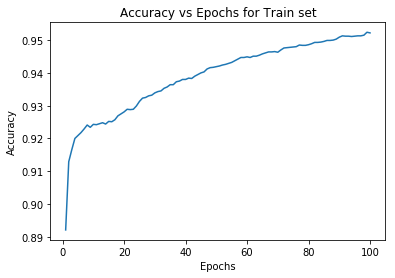

In [104]:
it = numpy.arange(1,len(acc_arr_train)+1)
plt.plot(it,acc_arr_train)
plt.title("Accuracy vs Epochs for Train set")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

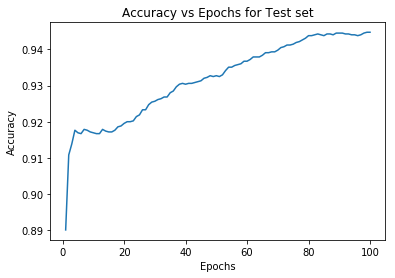

In [105]:
it = numpy.arange(1,len(acc_arr)+1)
plt.plot(it,acc_arr)
plt.title("Accuracy vs Epochs for Test set")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()